## Estadística Aplicada
Parcial #2

Patricio Ruiz Rodriguez 1897914

Grupo 41

In [1]:
## Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Librerias especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

## 1. Análisis exploratorio

a) ¿Cuántas variables y cuantas observaciones tiene la base?

In [3]:
## Importar datos
creditos = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

In [4]:
creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta             1000 non-null   object
 1   meses                    1000 non-null   int64 
 2   historia_crediticia      1000 non-null   object
 3   uso                      1000 non-null   object
 4   cantidad                 1000 non-null   int64 
 5   saldo_cuenta_ahorro      817 non-null    object
 6   años_trabajando          1000 non-null   object
 7   tasa_de_interes          1000 non-null   int64 
 8   genero_estado_civil      1000 non-null   object
 9   aval                     52 non-null     object
 10  años_actual_domicilio    1000 non-null   int64 
 11  activos                  1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  planes_de_pago           186 non-null    object
 14  casa                     1000 non-null   

*21 variables y 1000 observaciones*

b) ¿Cuál es el monto promedio de los créditos otorgados por el banco?

In [5]:
creditos.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


In [6]:
creditos['cantidad'].mean().round(2)

3271.26

*El monto promedio de los créditos otorgados por el banco es: €3,271.26*

c) ¿Cuál es  el  tiempo  promedio  que  se  tardaron  en  pagar  el  préstamo  los que pagaron el préstamo en su totalidad?

In [7]:
creditos.groupby('credito_pagado')['meses'].mean().round(1)

credito_pagado
0    24.9
1    19.2
Name: meses, dtype: float64

*Las personas que pagaron el préstamo en su totalidad tardaron en pagarlo en promedio 19.2 meses*

d) ¿Cuál es la tasa de interés promedio otorgada por el banco?

In [8]:
creditos['tasa_de_interes'].mean()

2.973

*La tasa de interés promedio es de 2.973*

e) ¿Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron?

In [9]:
pagado = creditos[creditos['credito_pagado']==1]

In [10]:
pagado['cantidad'].mean().round(2)

2985.46

In [11]:
pagado['tasa_de_interes'].mean()

2.92

*Monto promedio: €2,985.46*


*Tasa de interés promedio: 2.92*

f) ¿Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado?

In [12]:
no_pagado = creditos[creditos['credito_pagado']==0]

In [13]:
no_pagado['cantidad'].mean().round(2)

3938.13

In [14]:
no_pagado['tasa_de_interes'].mean().round(3)

3.097

*Monto promedio: €3,938.13*

*Tasa de interés promedio: 3.097*

## 2. Estime un modelo de Kaplan-meier 

In [15]:
from lifelines import KaplanMeierFitter

In [16]:
creditos.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


a) ¿Cuál es la mediana del tiempo y que significa?

In [17]:
km = KaplanMeierFitter().fit(creditos['meses'],creditos['credito_pagado'])

In [18]:
km.median_survival_time_

24.0

*Significa que al mes 24 la mitad de las personas han pagado el credito*

b) ¿Es mayor/menor que el tiempo promedio del inciso 1c?

In [27]:
km3 = KaplanMeierFitter().fit(pagado['meses'],pagado['credito_pagado'])

In [28]:
km3.median_survival_time_

18.0

*Es mayor pero el inciso 1c toma en cuenta solo a los que si pagaron el credito en su totalidad, si tomamos la mediana de solo los que si pagaron el credito en su totalidad si es menor al tiempo promedio del inciso 1c*

## 3. Determine si el riesgo de que el préstamo se pague en su totalidad es constante,creciente, decreciente, o tipo log-normal respecto al tiempo

<Axes: xlabel='timeline'>

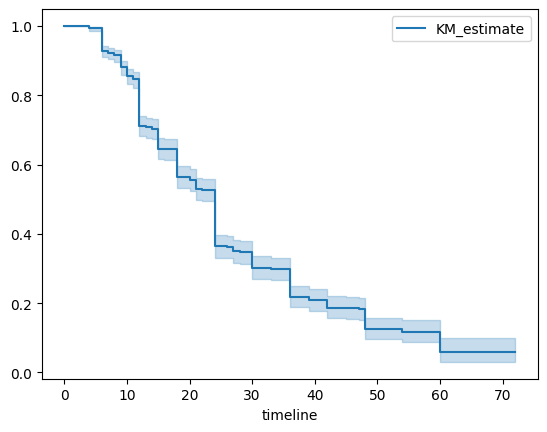

In [21]:
km.plot_survival_function()

*El riesgo es decreciente conforme va aumentando el tiempo*

## 4. Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

In [22]:
from lifelines import CoxPHFitter
import seaborn as sns

a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

*Las variables elegidas son: tasa de interes, cantidad, dependientes económicos, teléfono crediticio, numero de créditos y edad*

b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo delevento y por qué

- **Tasa de interés:** Una tasa de interes alta hará que el pago total sea mayor lo que la probabilidad de cumplimiento del crédito puede disminuir.
- **Cantidad:** Una cantidad alta otorgada podria significar mayor dificultad de cumplimiento de pago.
- **Dependientes económicos:** Al tener más obligaciones la probabilidad de pago puede disminuir.
- **Teléfono:** Al no tener como ser contactado puede ser que no pague.
- **Número de créditos:** Mayor número de créditos significa más compromisos por lo que puedes disminuir la probabilidad de cumplir con el crédito.
- **Edad:** Mayor edad disminuye el riegos ya que la estabilidad económica puede ser mejor.

c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

In [42]:
creditos_cox = pd.DataFrame(creditos, columns=['meses','credito_pagado','tasa_de_interes','cantidad','dependientes_economicos','telefono','numero_creditos','edad'])

In [43]:
creditos_cox

,meses,credito_pagado,tasa_de_interes,cantidad,dependientes_economicos,telefono,numero_creditos,edad
0,6,1,4,1169,1,1,2,67
1,48,0,2,5951,1,0,1,22
2,12,1,2,2096,2,0,1,49
3,42,1,2,7882,2,0,1,45
4,24,0,3,4870,2,0,2,53
...,...,...,...,...,...,...,...,...
995,12,1,3,1736,1,0,1,31
996,30,1,4,3857,1,1,1,40
997,12,1,4,804,1,0,1,38
998,45,0,4,1845,1,1,1,23


In [44]:
creditos_cox.isnull().sum()

meses                      0
credito_pagado             0
tasa_de_interes            0
cantidad                   0
dependientes_economicos    0
telefono                   0
numero_creditos            0
edad                       0
dtype: int64

In [45]:
creditos_cox.dtypes

meses                      int64
credito_pagado             int64
tasa_de_interes            int64
cantidad                   int64
dependientes_economicos    int64
telefono                   int64
numero_creditos            int64
edad                       int64
dtype: object

d) Estima  un  modelo  de  cox  con  las  variables  elegidas  e  interpreta  los coeficientes.

In [51]:
cph1 = CoxPHFitter().fit(creditos_cox,'meses', 'credito_pagado')
cph1.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4057.16
         time fit was run = 2023-10-07 19:11:59 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
tasa_de_interes          -0.42       0.66       0.04            -0.49            -0.35                 0.61                 0.71
cantidad                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
dependientes_economicos   0.03       1.03       0.11            -0.18             0.23                 0.84                 1.26
telefono                  0.10       1.10       0.08            -0.06             0.25                 0.95                 1.29
numero_creditos           0.11       1.12       0.07            -0.02             0.24                 0.98                 1.27
edad                      0.01       1.01       0.00             0.01             0.02                 1.01                 1.02

                          cmp to      z      p   -log2(p)
covariate                                                
tasa_de_interes             0.00 -11.49 <0.005      99.14
cantidad                    0.00 -16.45 <0.005     199.68
dependientes_economicos     0.00   0.26   0.79       0.34
telefono                    0.00   1.25   0.21       2.23
numero_creditos             0.00   1.64   0.10       3.32
edad                        0.00   4.15 <0.005      14.89
---
Concordance = 0.78
Partial AIC = 8126.32
log-likelihood ratio test = 424.45 on 6 df
-log2(p) of ll-ratio test = 291.71

**H0:** Bi = 0 

**H1:** Bi != 0

 p-value < $\alpha$ (.05) ->  Se rechaza Ho.

- **Tasa de interés:** 0.005<0.05 Se rechaza H0, por lo tanto la variable es significativa en el modelo, la tasa de interés si tiene influencia en el tiempo de pago.
- **Cantidad:** 0.005<0.05 Se rechaza H0, por lo tanto la variable es significativa en el modelo, la cantidad si tiene influencia en el tiempo de pago.
- **Dependientes económicos:** 0.79>0.05 No se rechaza H0, por lo tanto esta variable no es significativa, tener dependientes económicos no tiene influencia en el tiempo de pago.
- **Teléfono:** 0.21>0.05 No se rechaza H0, por lo tanto esta variable no es significativa, tener teléfono no tiene influencia en el tiempo de pago.
- **Número de créditos:** 0.1>0.05 No se rechaza H0, por lo tanto esta variable no es significativa, el número de créditos no tiene influencia en el tiempo de pago.
- **Edad:** 0.005<0.05 Se rechaza H0, por lo tanto la variable es significativa en el modelo, , la edad si tiene influencia en el tiempo de pago.

## 5. Con  base  en  los  cálculos  realizados,  redacta  un  comentario integral de  por  lo menos  250 palabras que  resuma  el  análisis,  reflexiones  y  recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión.

*El banco evidentemente desea que sus clientes realicen el pago completo de sus préstamos es por esto por lo que se les recomienda que, al otorgar un crédito a una persona, se revisen con mayor énfasis las características del cliente que identificamos, tienen un impacto en la probabilidad de que el cliente cumpla o incumpla.* 

*Como vimos, una tasa de interés alta hace más probable que los clientes incumplan con su pago con mayor facilidad, es por esto por lo que recomendamos al banco otorgar tasa de interés más bajas que resultaran en menos ganancias por cada préstamo, pero un mayor índice de pago por parte de los clientes.*

 *Por otro lado, la cantidad que se otorga en cada crédito también afecta la probabilidad de incumplimiento, los créditos más grandes son más probables de no ser pagados en su totalidad, pero esto está relacionado a su vez a la tasa de interés vista en el punto anterior.*

*En cuanto a la edad, entre mayor sea esta, es más probable que se cumpla con el pago, por lo que una medida puede ser que a los clientes más jóvenes se les otorgue solamente créditos con una cantidad no tan alta.*

*También analizamos que en promedio las personas que si realizaron el pago completo de su préstamo lo hicieron en 19.2 meses por lo que recomendamos al banco no otorgar créditos que sean superiores por muchos meses a este número ya que después de los 30 meses la probabilidad de que se pague el crédito completamente es menor al 40%*
